In [1]:
import warnings

import dask
import ncar_jobqueue
import yaml

import utils

%matplotlib inline
%load_ext autoreload
%autoreload 2


In [2]:
with open("diag_metadata.yaml", mode="r") as fptr:
    diag_metadata_list = yaml.safe_load(fptr)

varnames = utils.get_varnames_from_metadata_list(diag_metadata_list)

In [3]:
def summary_plots(ds, diag_metadata):
    varname = diag_metadata["varname"]
    print(varname)
    da = ds[varname].isel(diag_metadata.get("isel_dict"))

    utils.summary_plot_global_ts(ds, da, diag_metadata, time_coarsen_len=12)

    utils.summary_plot_histogram(da, diag_metadata)

In [4]:
cluster = ncar_jobqueue.NCARCluster(
    cores=2, memory="64 GB", processes=2, walltime="6:00:00"
)
cluster.scale(n=8)  # n = number of workers
print(f"dashboard_link={cluster.dashboard_link}")

dashboard_link=https://jupyterhub.ucar.edu/dav/user/mlevy/proxy/39042/status


/glade/work/mlevy/miniconda3/envs/hires-marbl/lib/python3.7/site-packages/distributed/dashboard/core.py:79: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


Datasets contain a total of 48 time samples
Last average written at 0005-01-01 00:00:00
POC_FLUX_100m


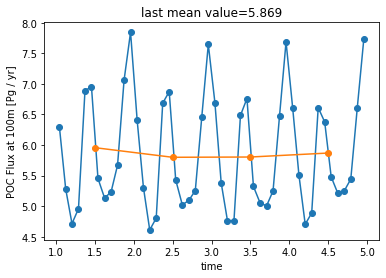

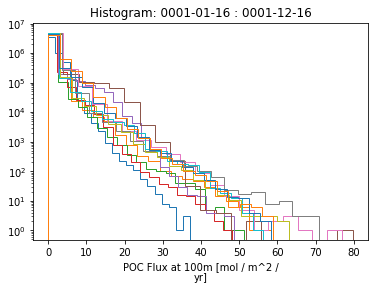

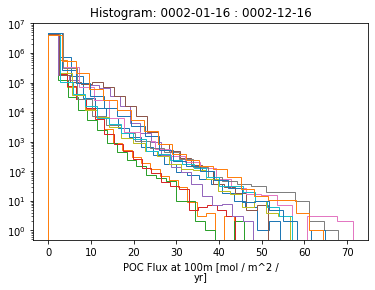

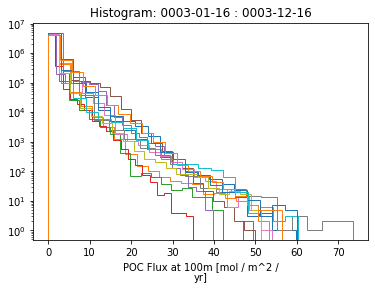

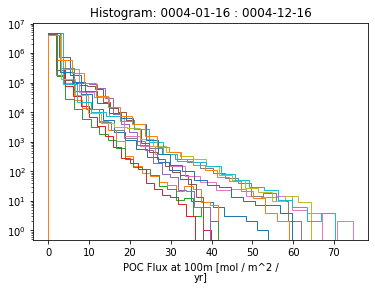

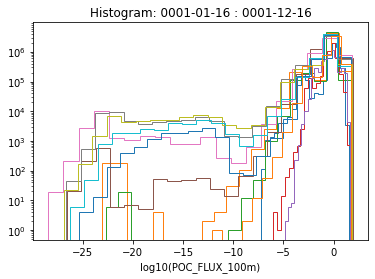

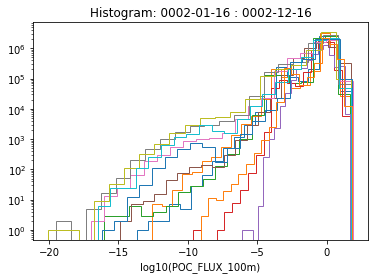

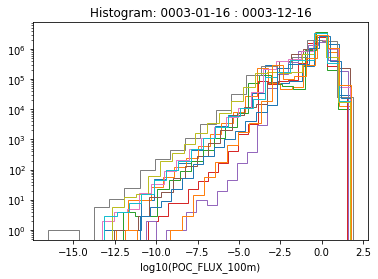

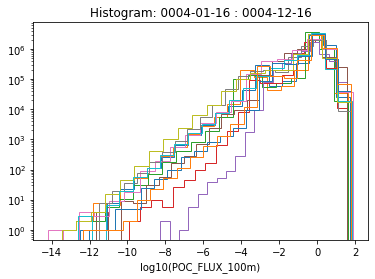

CaCO3_FLUX_100m


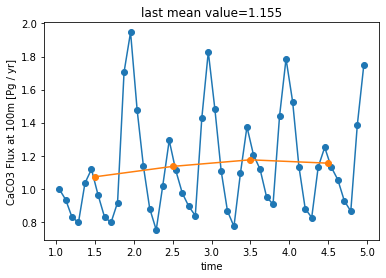

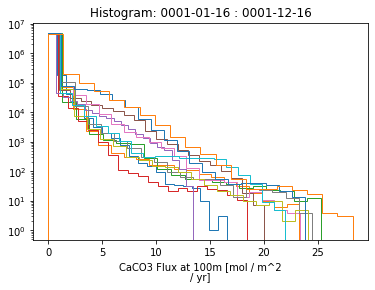

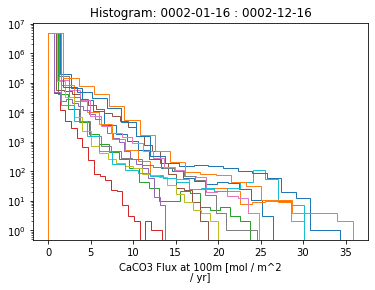

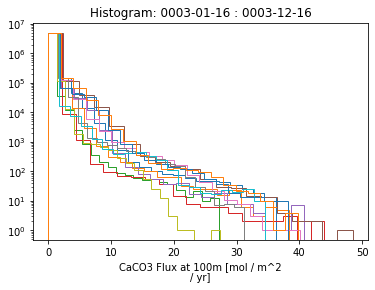

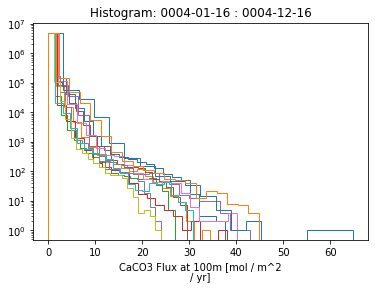

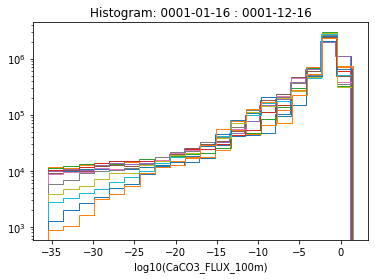

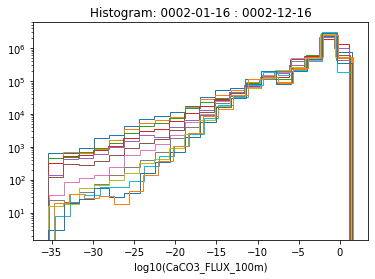

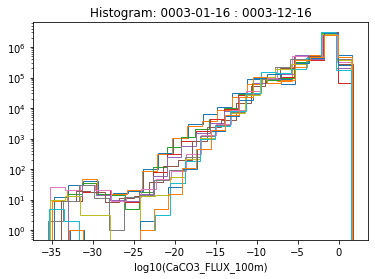

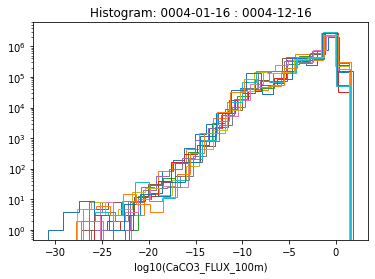

FG_CO2


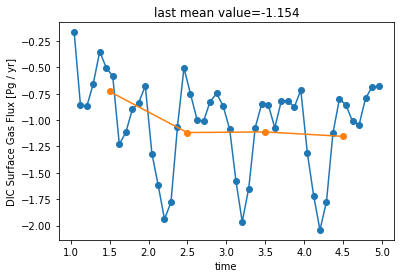

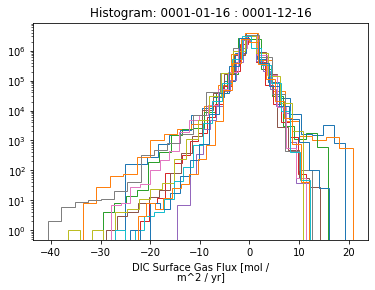

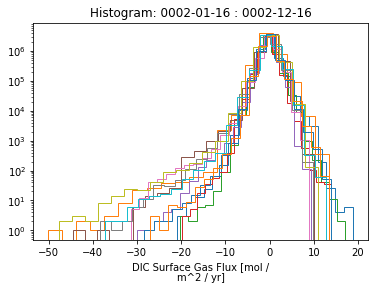

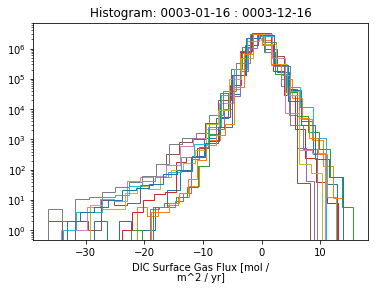

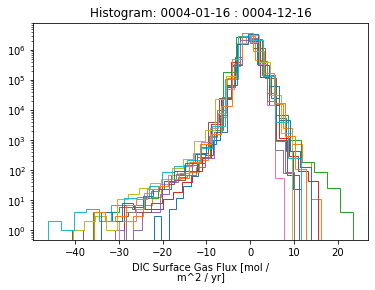

DpCO2


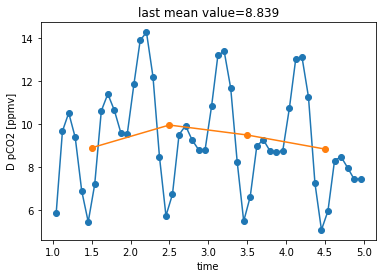

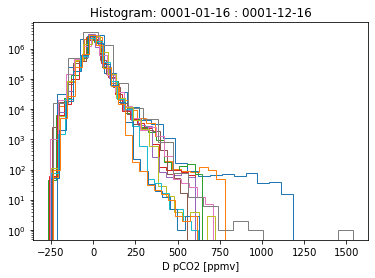

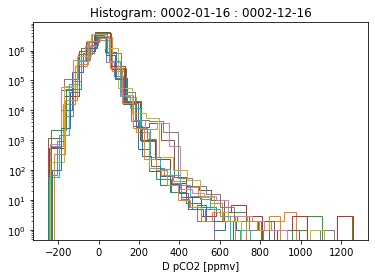

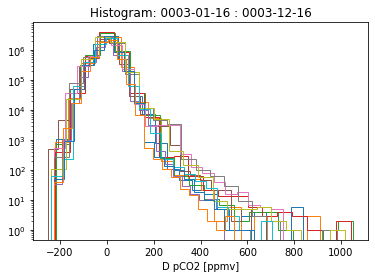

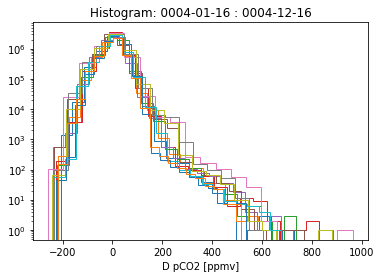

PH


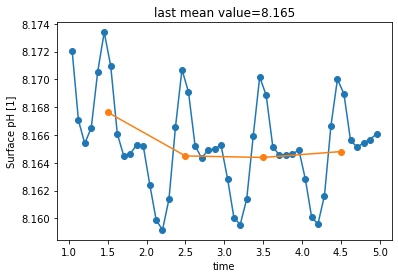

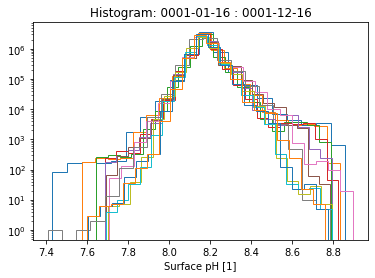

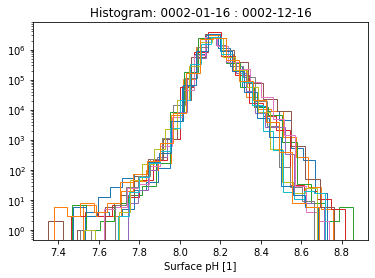

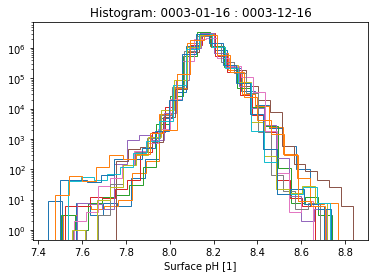

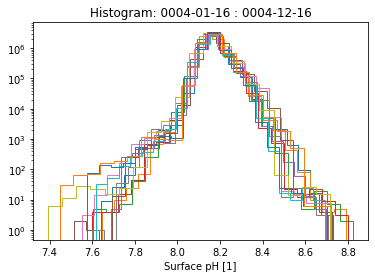

spChl


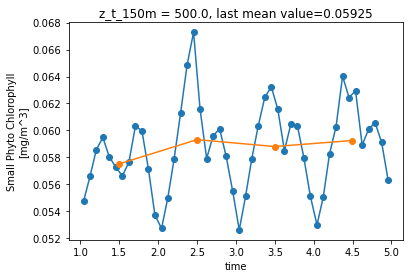

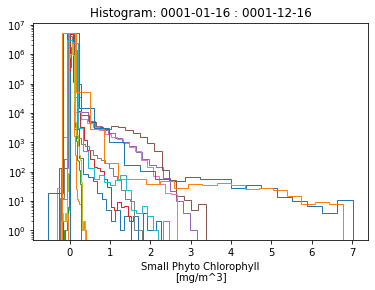

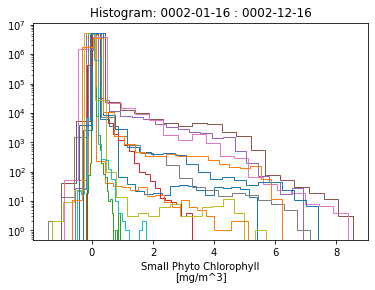

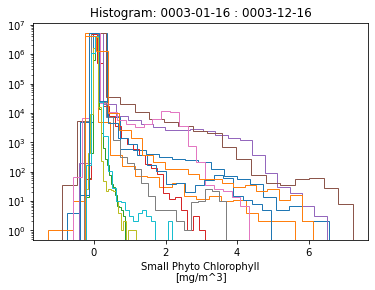

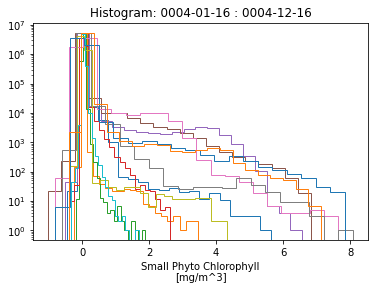

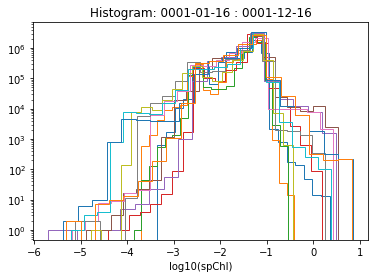

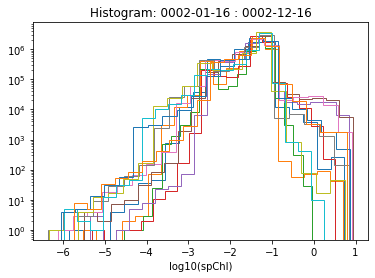

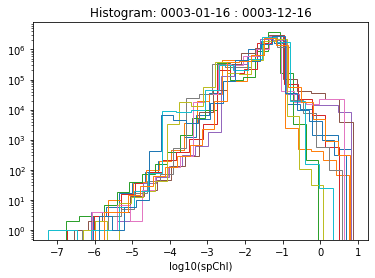

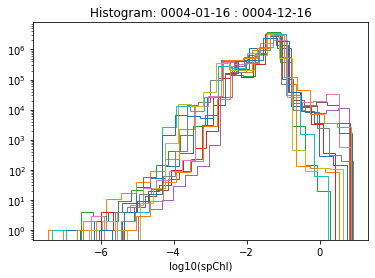

photoC_sp_zint


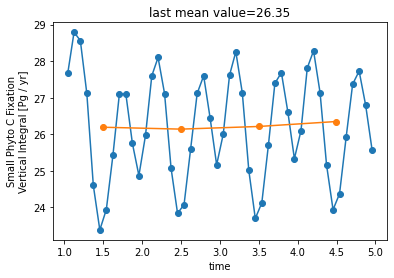

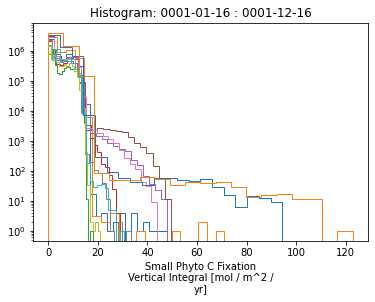

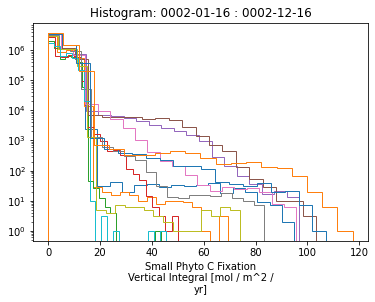

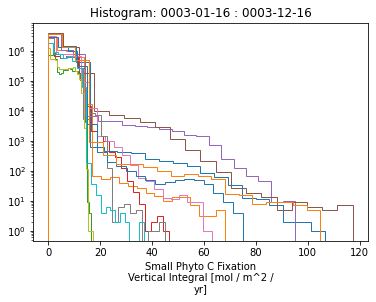

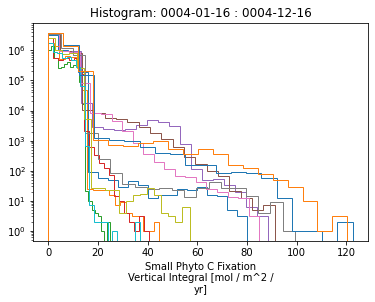

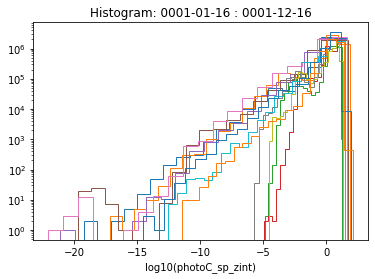

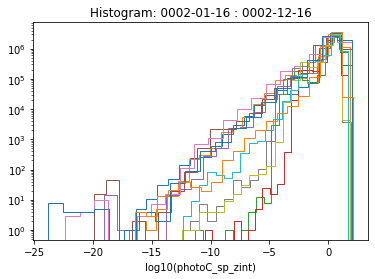

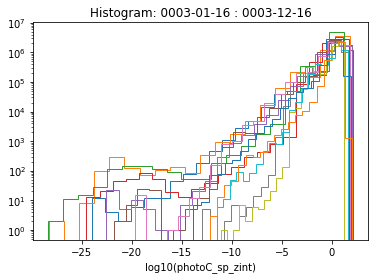

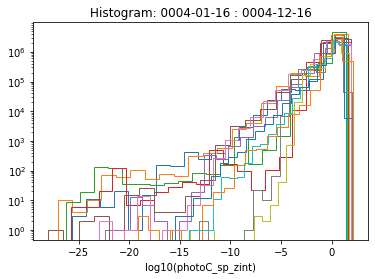

coccoChl


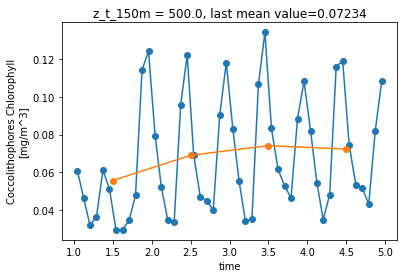

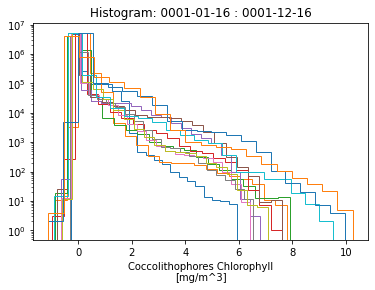

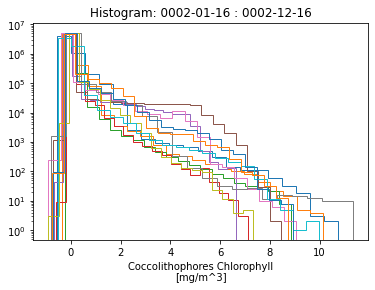

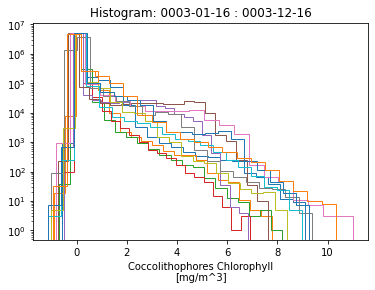

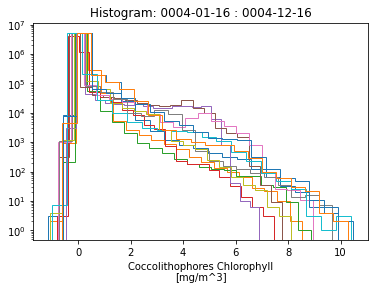

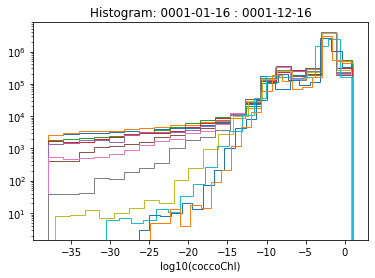

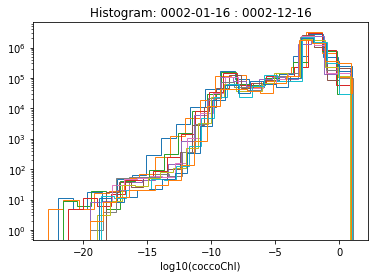

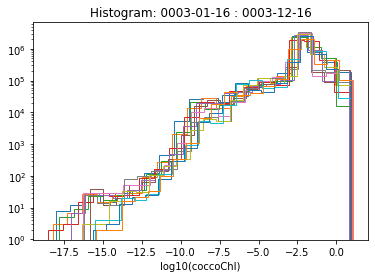

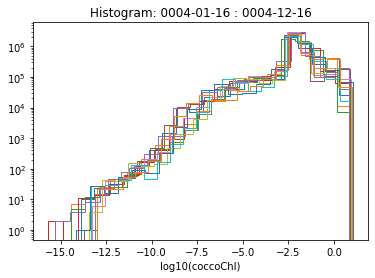

photoC_cocco_zint


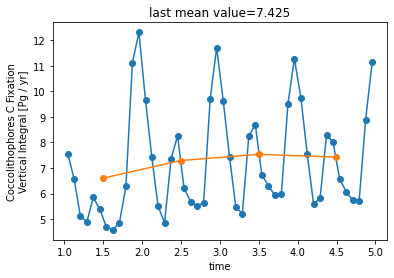

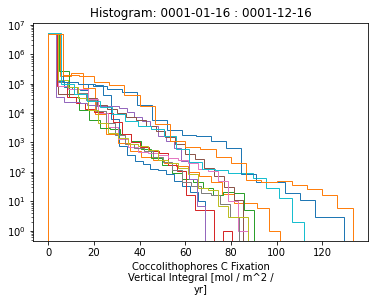

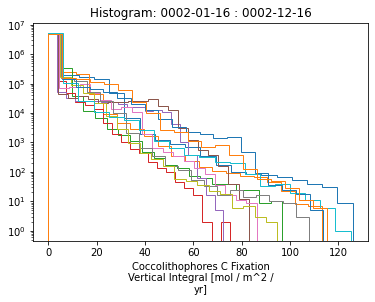

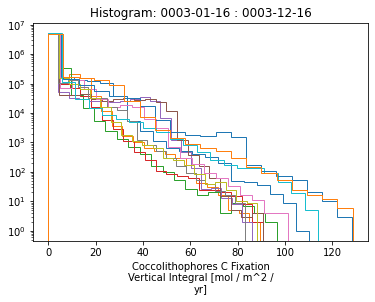

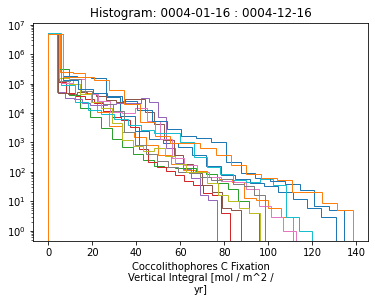

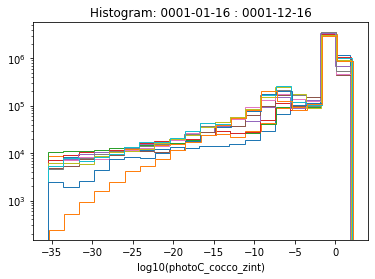

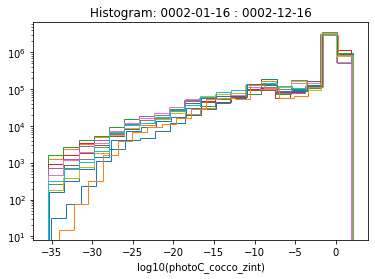

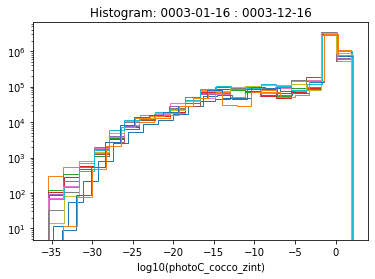

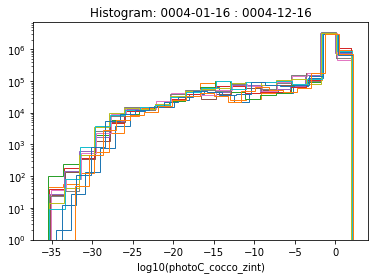

diatChl


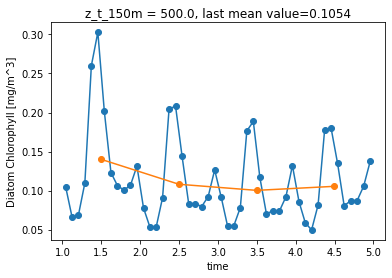

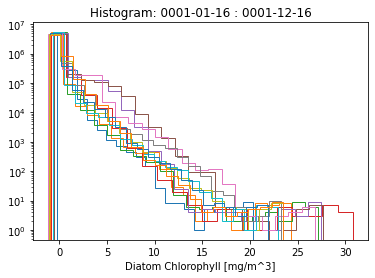

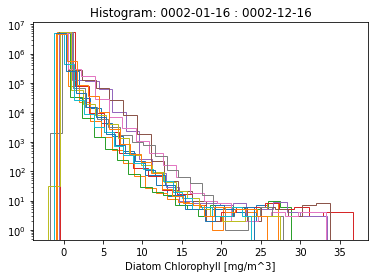

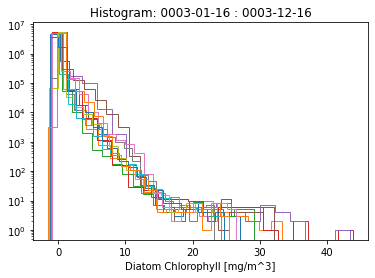

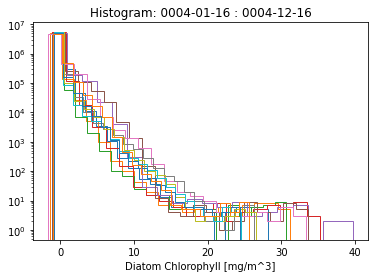

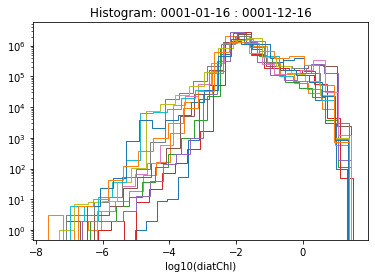

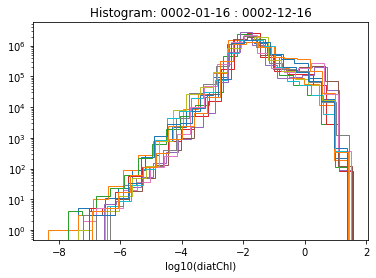

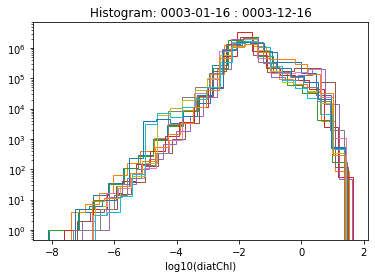

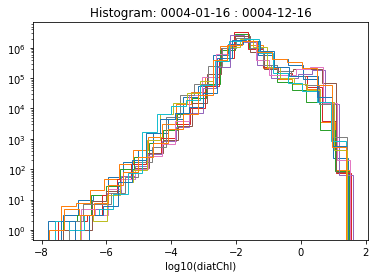

photoC_diat_zint


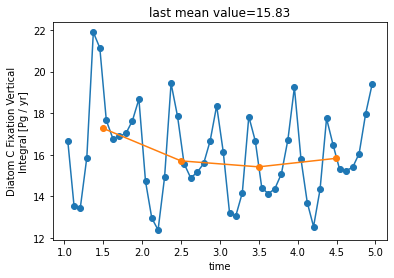

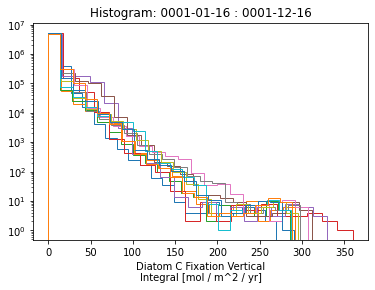

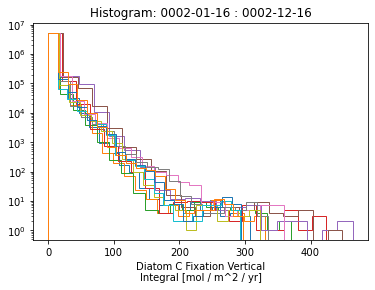

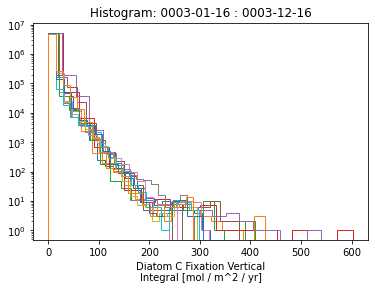

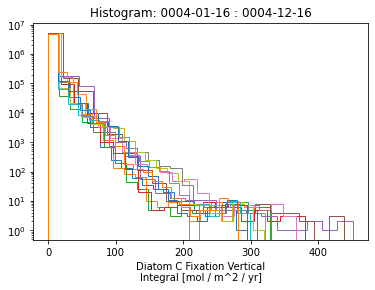

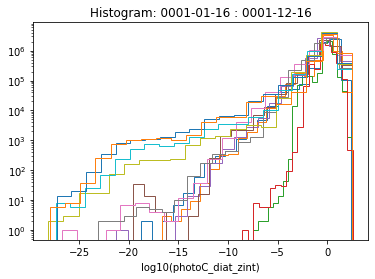

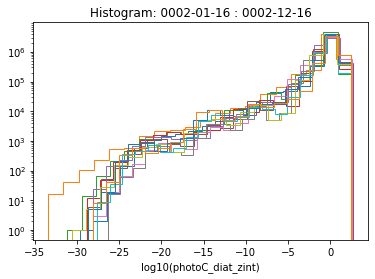

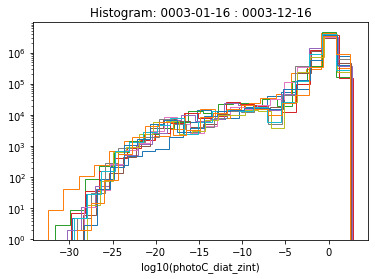

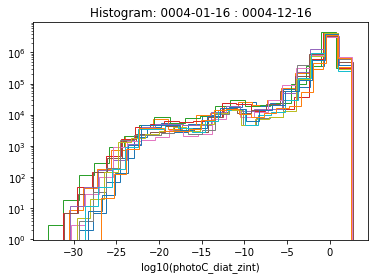

diazChl


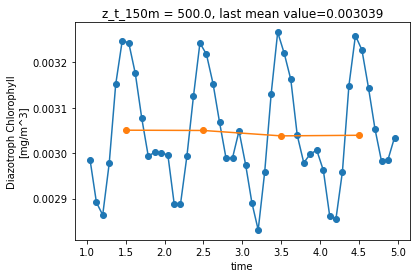

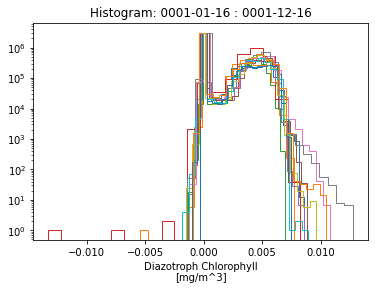

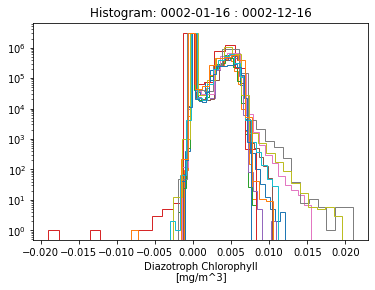

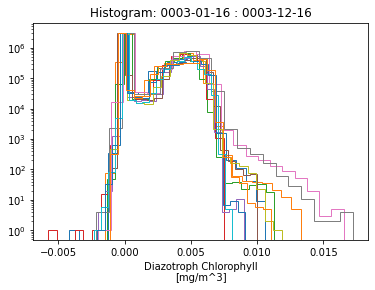

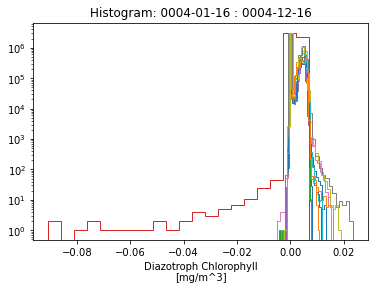

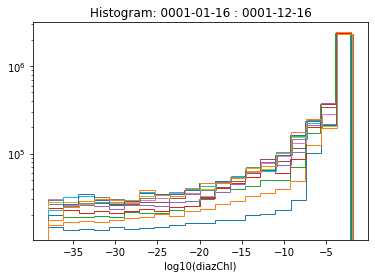

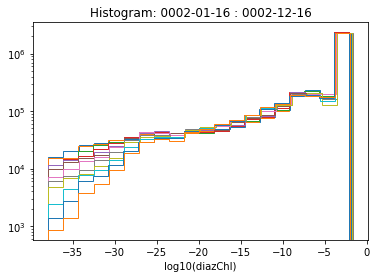

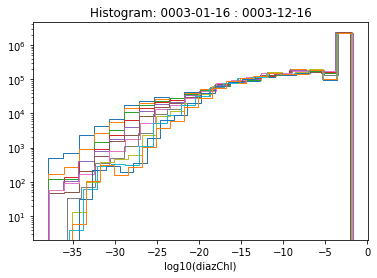

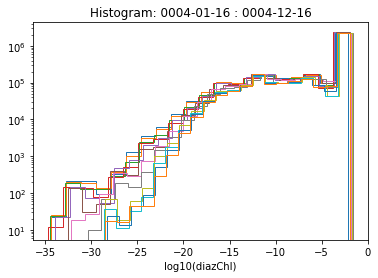

photoC_diaz_zint


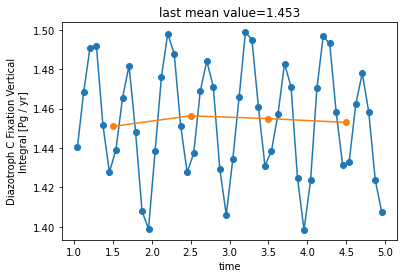

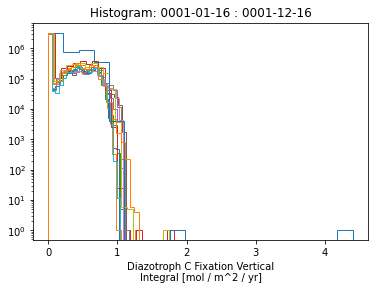

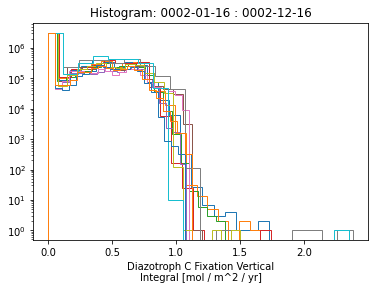

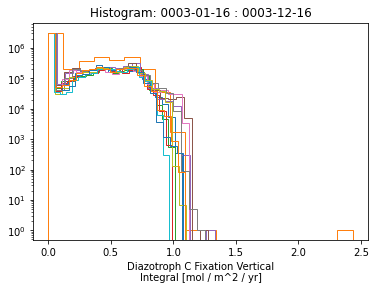

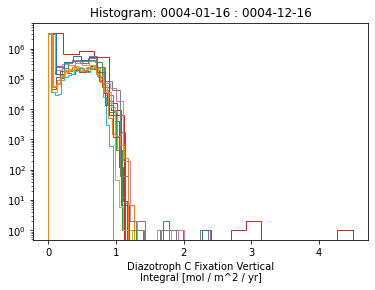

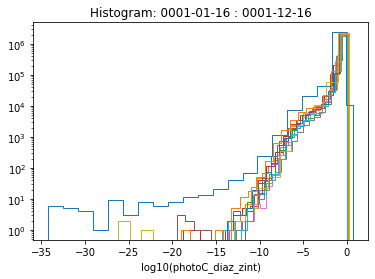

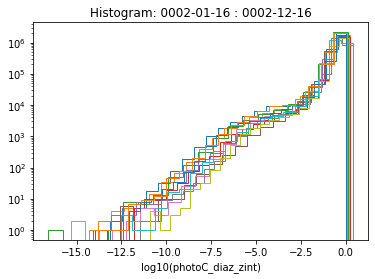

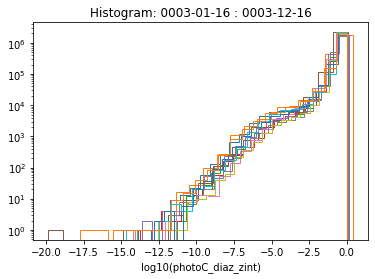

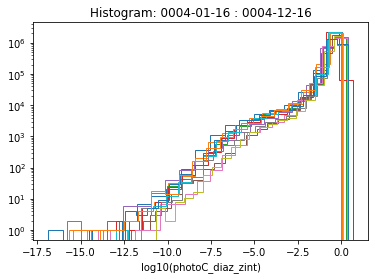

NHx_SURFACE_EMIS


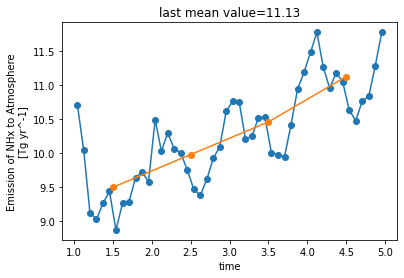

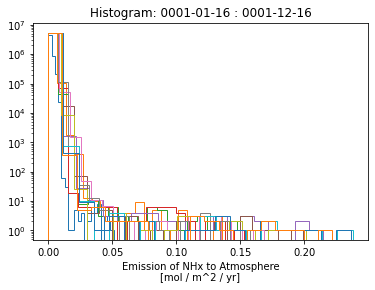

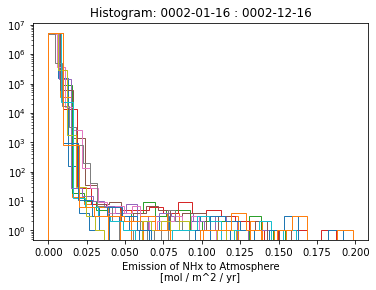

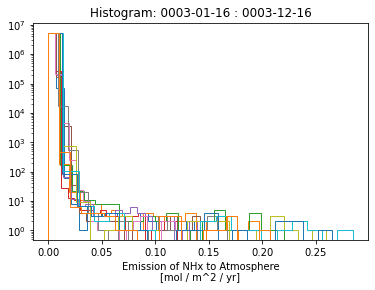

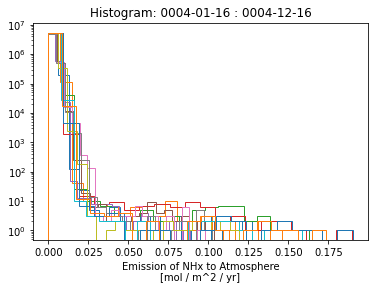

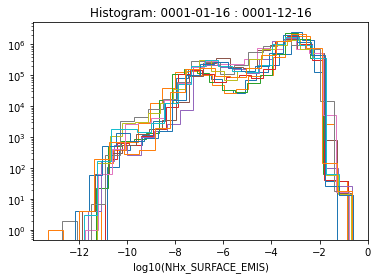

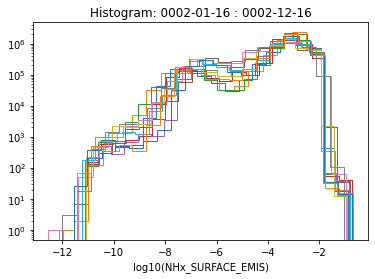

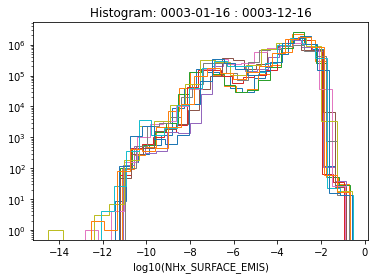

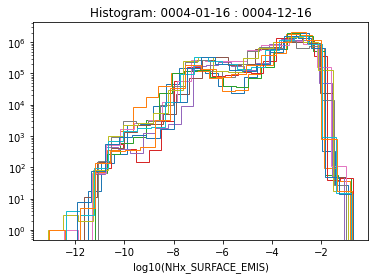

NH4


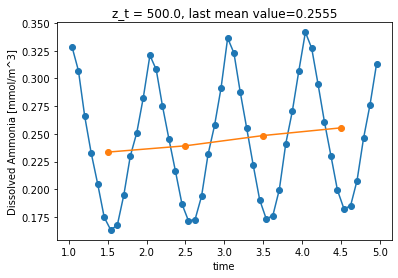

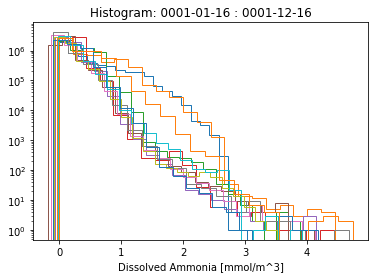

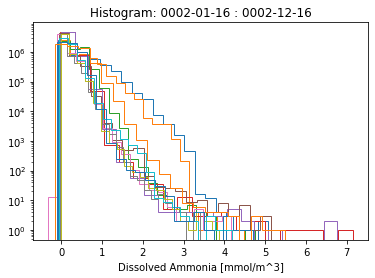

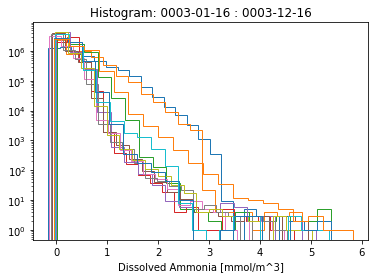

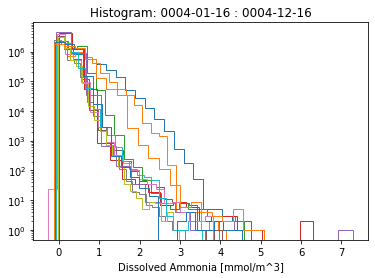

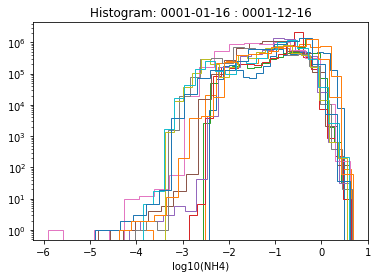

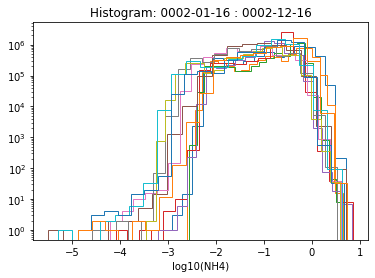

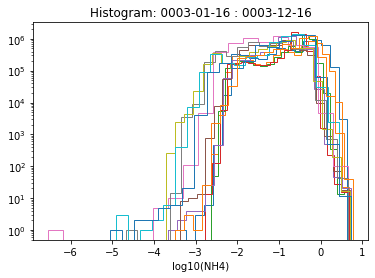

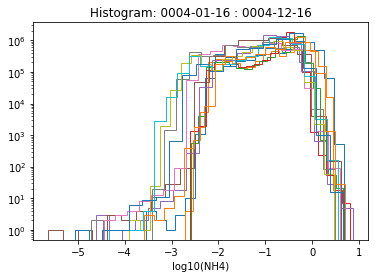

O2_ZMIN


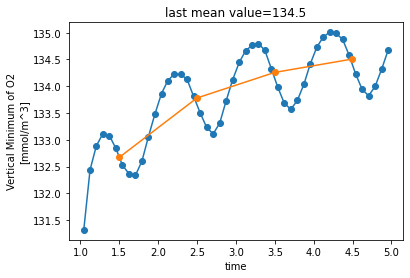

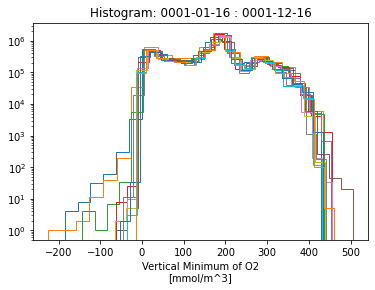

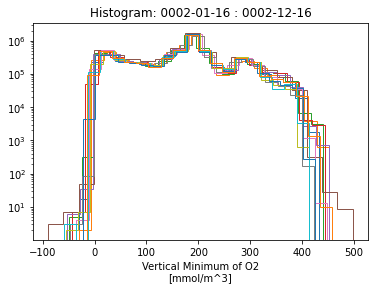

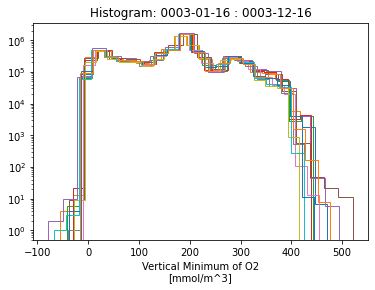

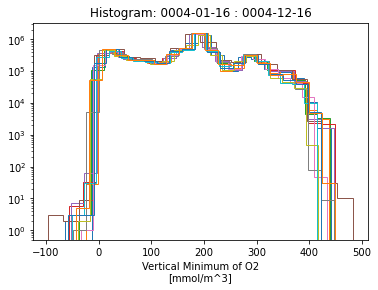

O2_ZMIN_DEPTH


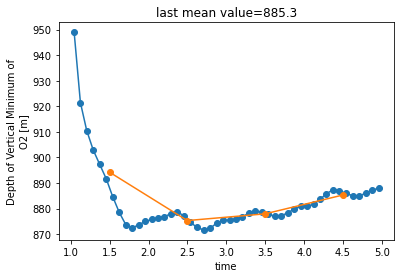

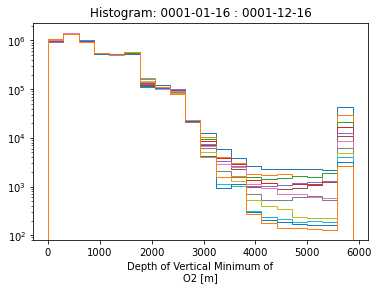

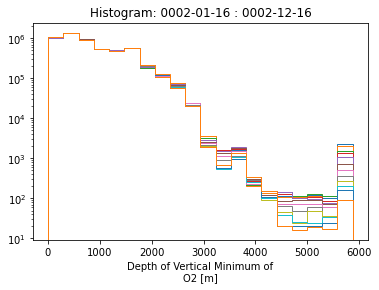

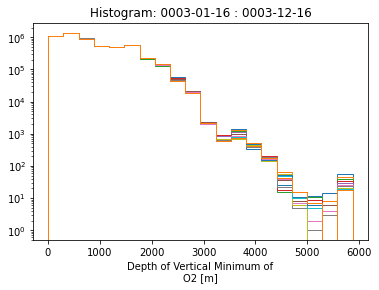

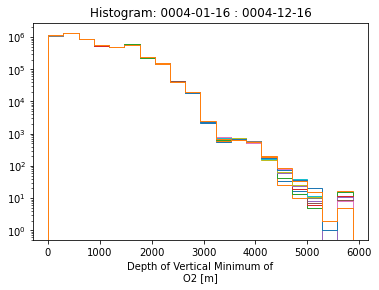

O2


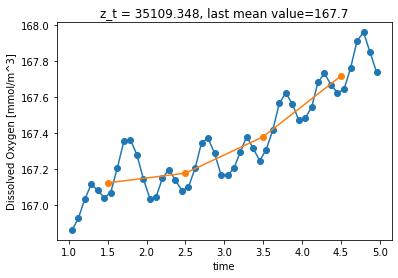

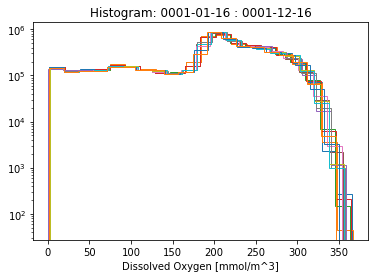

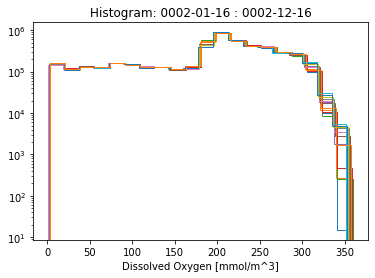

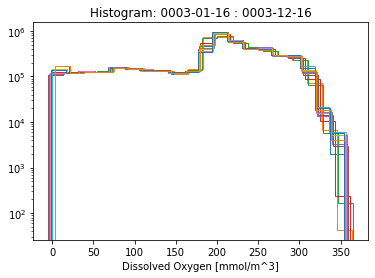

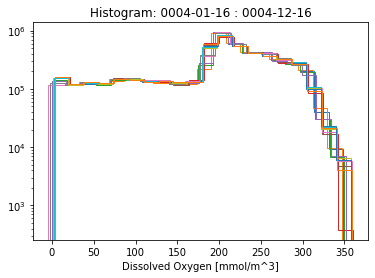

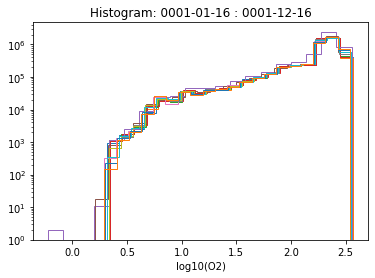

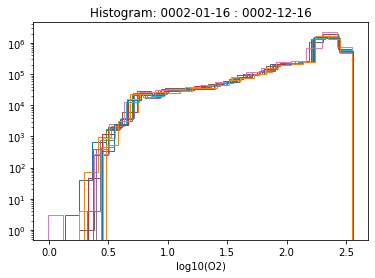

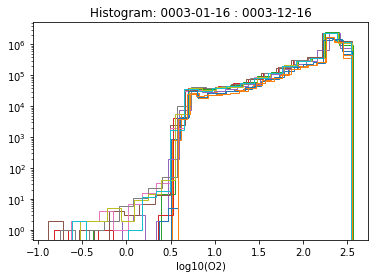

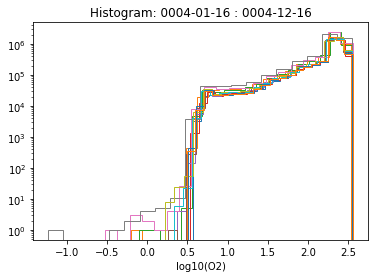

PO4


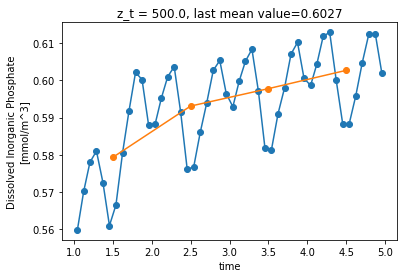

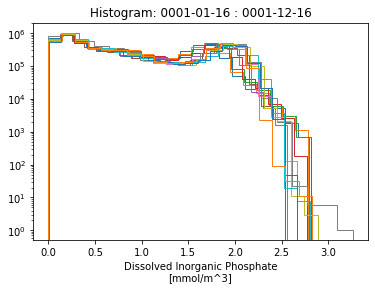

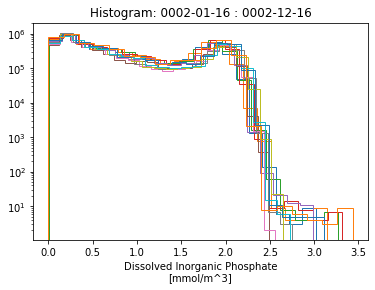

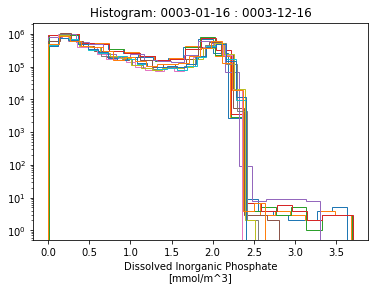

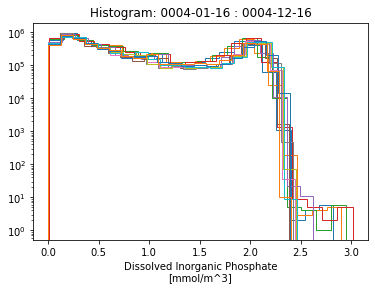

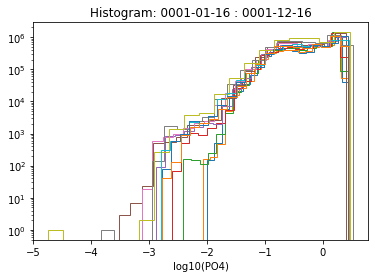

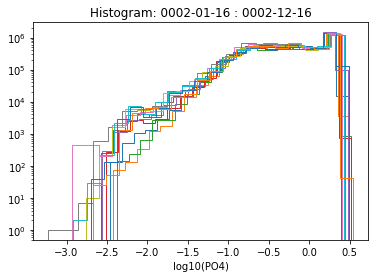

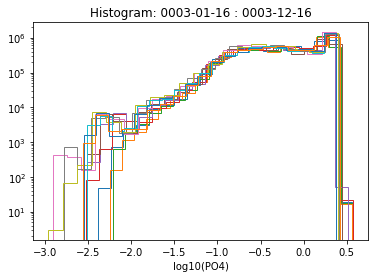

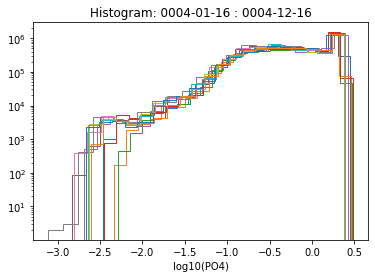

PO4


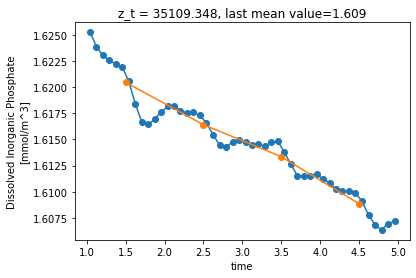

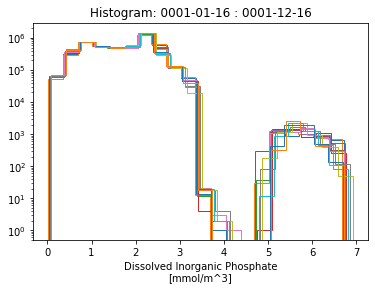

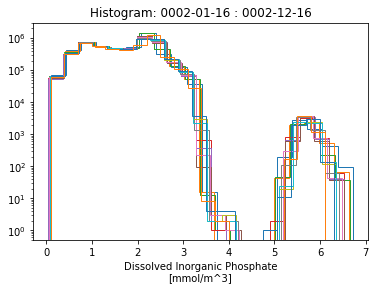

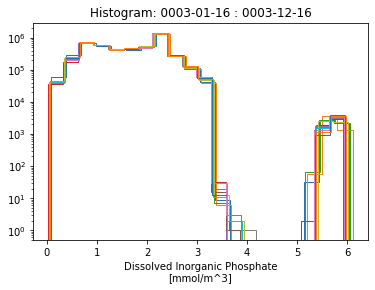

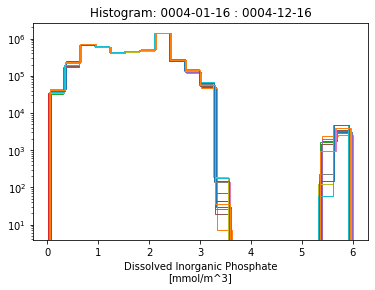

NO3


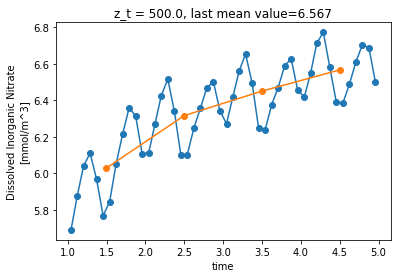

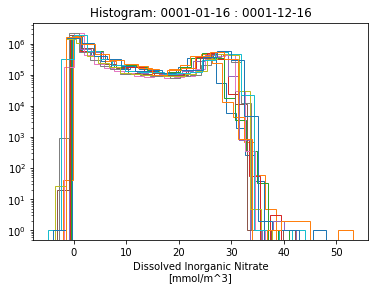

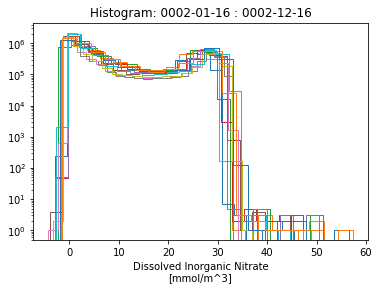

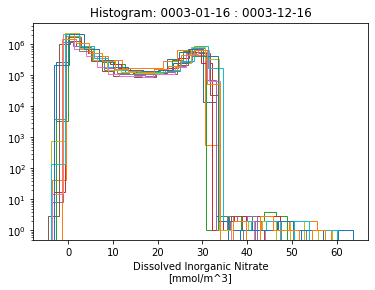

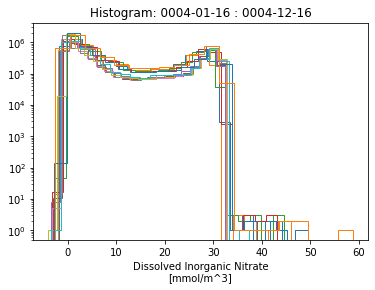

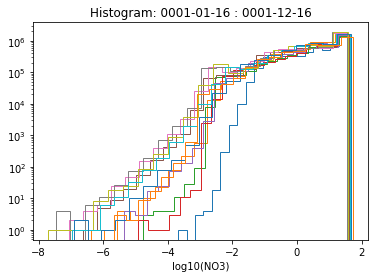

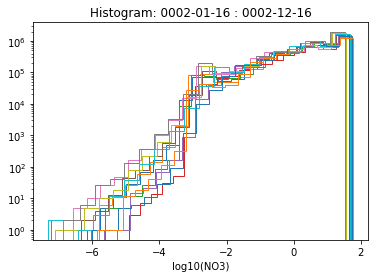

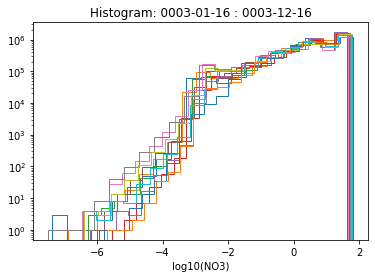

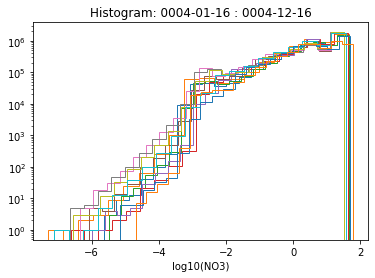

NO3


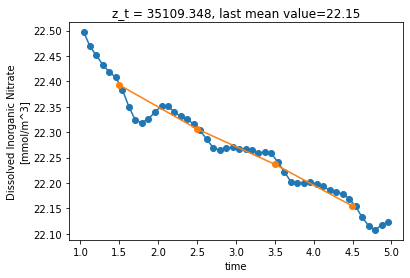

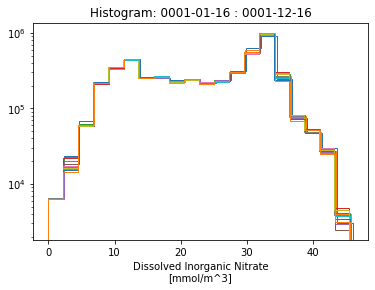

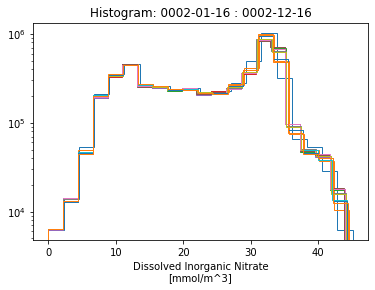

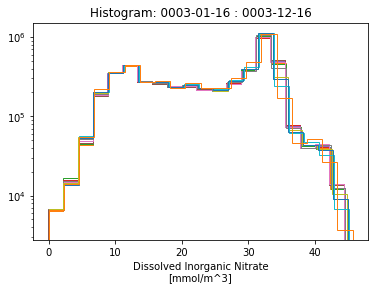

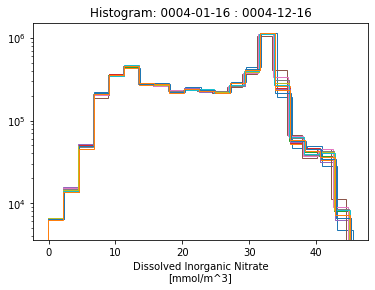

SiO3


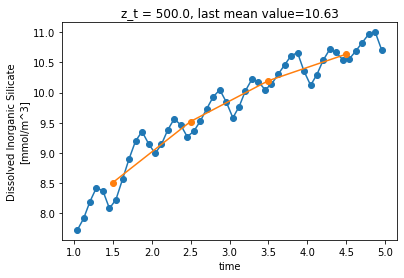

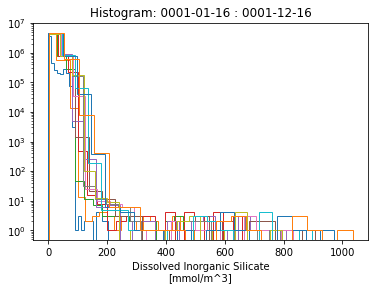

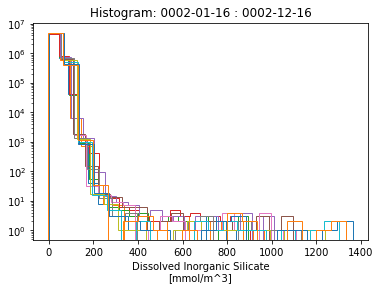

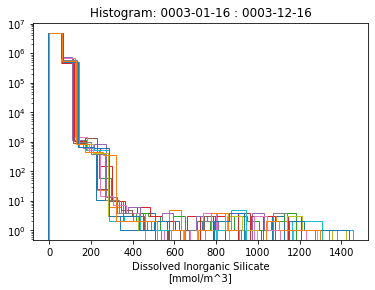

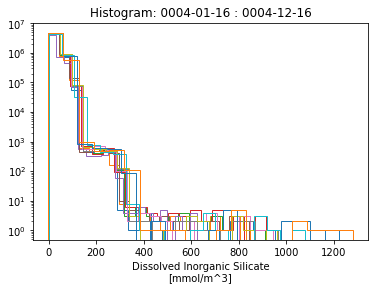

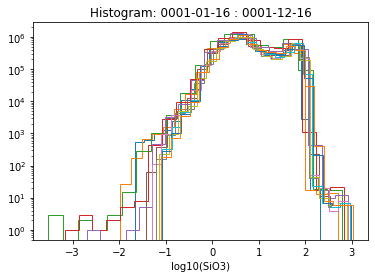

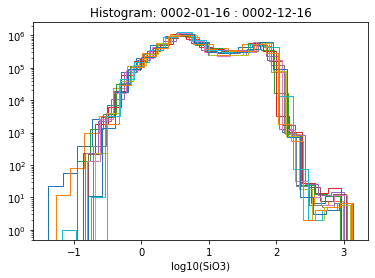

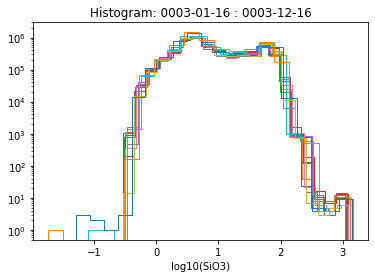

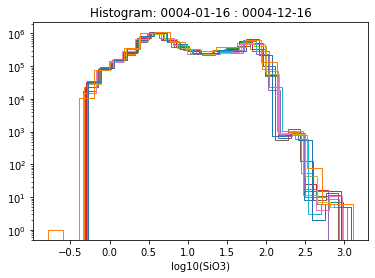

SiO3


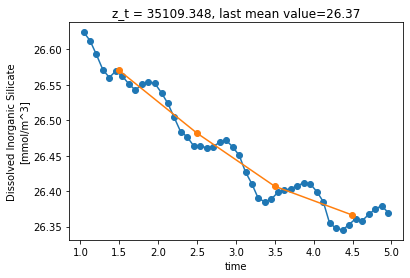

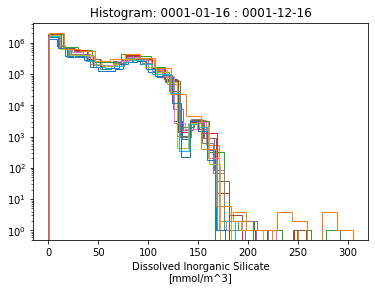

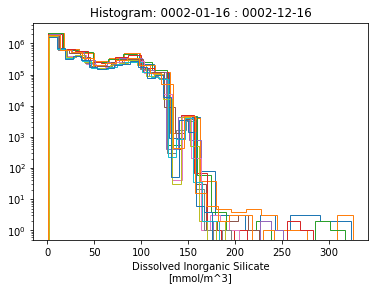

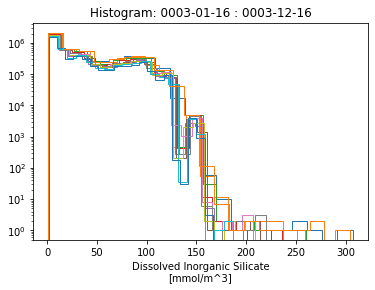

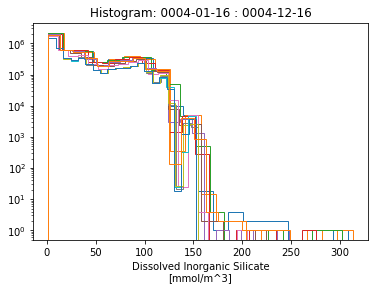

In [5]:
with dask.distributed.Client(cluster) as client:
    case = utils.CaseClass("g.e22.G1850ECO_JRA_HR.TL319_t13.003")
    stream = "pop.h"
    ds = case.gen_dataset(varnames, stream)
    for diag_metadata in diag_metadata_list:
        summary_plots(ds, diag_metadata)

In [6]:
cluster.close()